# Data pretreatment from one file

We are going to use `boiler_226.csv` to go through the different pretreatment process in order to obtain at the end a data that can be used to test the `ADPC` algorithm

The result will be saved into `datasets/pretreated` folder with the same name.

In [1]:
import os
file_name = 'boiler_226.csv'
datasets_path = "./datasets/raw/"
full_path = os.path.join(datasets_path, file_name)

In [2]:
import pandas as pd
boiler_data = pd.read_csv(full_path, parse_dates=True,index_col='timestamp') # Remplacer la colonne des index par celle de 'timestamp'

In [3]:
boiler_data.head()

,power
timestamp,
2021-02-18 05:28:53+00:00,1.0
2021-02-18 05:28:54+00:00,1.0
2021-02-18 05:28:55+00:00,1.0
2021-02-18 05:28:56+00:00,1.0
2021-02-18 05:28:57+00:00,1.0


We can notice that the power consumption is collected every `1s (one second)`

We are going to reduce it in two different ways
1. we are going to take the power consumption every `15min`. The result will be similar to the power consumption collected every `15min`
2. we are going to summarize the power consumption of every `15min` to a single value, the mean. We will obtain the average of the power consumption collected every `15min``

## Every `15min`

`1min = 60s` so `15min = 60*15s = 900s`

We need to extract data every `900 step`

In [6]:
boiler_data[::900]

,power
timestamp,
2021-02-18 05:28:53+00:00,1.0
2021-02-18 05:43:53+00:00,1.0
2021-02-18 05:58:53+00:00,1.0
2021-02-18 06:13:53+00:00,1.0
2021-02-18 06:28:53+00:00,1.0
...,...
2021-03-20 04:13:53+00:00,1.0
2021-03-20 04:28:53+00:00,1.0
2021-03-20 04:43:53+00:00,1.0


In [7]:
boiler_15min = boiler_data[::900]
boiler_15min.head()

,power
timestamp,
2021-02-18 05:28:53+00:00,1.0
2021-02-18 05:43:53+00:00,1.0
2021-02-18 05:58:53+00:00,1.0
2021-02-18 06:13:53+00:00,1.0
2021-02-18 06:28:53+00:00,1.0


<Axes: ylabel='Frequency'>

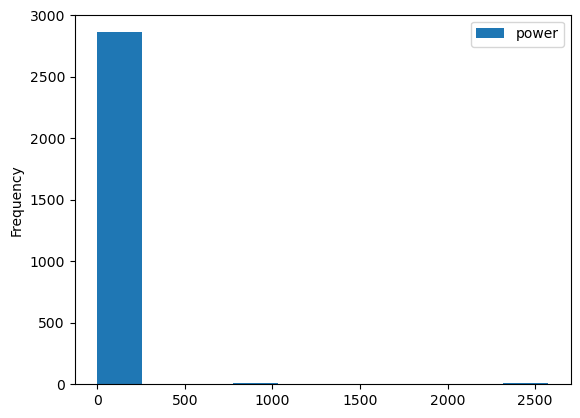

In [8]:
boiler_15min.plot(kind='hist')

In [15]:
boiler_15min["power"].value_counts(bins=20)

(-2.576, 128.75]     2861
(772.5, 901.25]         9
(2446.25, 2575.0]       7
(1545.0, 1673.75]       1
(128.75, 257.5]         1
(1673.75, 1802.5]       1
(386.25, 515.0]         0
(2317.5, 2446.25]       0
(2188.75, 2317.5]       0
(2060.0, 2188.75]       0
(1931.25, 2060.0]       0
(1802.5, 1931.25]       0
(1416.25, 1545.0]       0
(515.0, 643.75]         0
(1158.75, 1287.5]       0
(1030.0, 1158.75]       0
(901.25, 1030.0]        0
(257.5, 386.25]         0
(643.75, 772.5]         0
(1287.5, 1416.25]       0
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

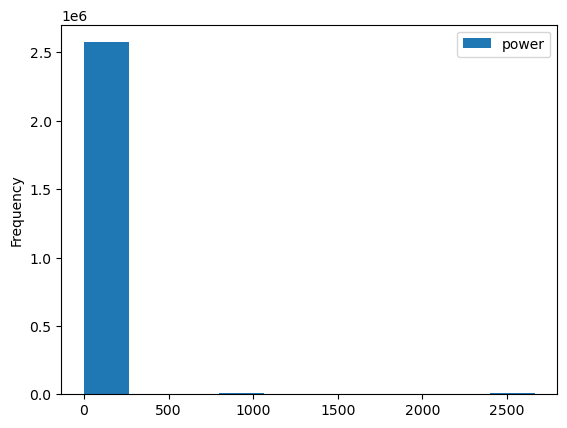

In [9]:
boiler_data.plot(kind='hist')

In [16]:
boiler_data["power"].value_counts(bins=20)

(-2.665, 133.2]     2573415
(799.2, 932.4]         6379
(2530.8, 2664.0]       6300
(2397.6, 2530.8]       3684
(1731.6, 1864.8]        906
(1598.4, 1731.6]        542
(133.2, 266.4]          314
(266.4, 399.6]          171
(1465.2, 1598.4]         80
(532.8, 666.0]           39
(2264.4, 2397.6]         38
(1065.6, 1198.8]         34
(399.6, 532.8]           29
(2131.2, 2264.4]         23
(1332.0, 1465.2]         16
(1198.8, 1332.0]         12
(1998.0, 2131.2]         12
(666.0, 799.2]            3
(932.4, 1065.6]           2
(1864.8, 1998.0]          1
Name: count, dtype: int64

In [19]:
file_name = 'boiler_226_15min.csv'
datasets_path = "./datasets/simplified/"
full_path = os.path.join(datasets_path, file_name)

boiler_15min.to_csv(full_path)

In [20]:
file_name = 'dishwasher_53.csv'
datasets_path = "./datasets/raw/"
full_path = os.path.join(datasets_path, file_name)

dishwasher_data = pd.read_csv(full_path, parse_dates=True,index_col='timestamp')
dishwasher_15min = dishwasher_data[::900]
print(dishwasher_15min.head())

file_name = 'dishwasher_53_15min.csv'
datasets_path = "./datasets/simplified/"
full_path = os.path.join(datasets_path, file_name)

dishwasher_15min.to_csv(full_path)

                           power
timestamp                       
2021-01-18 00:51:25+00:00    2.0
2021-01-18 01:06:25+00:00    2.0
2021-01-18 01:21:25+00:00    3.0
2021-01-18 01:36:25+00:00    3.0
2021-01-18 01:51:25+00:00    2.0


In [21]:
file_name = 'computer_44.csv'
datasets_path = "./datasets/raw/"
full_path = os.path.join(datasets_path, file_name)

computer_data = pd.read_csv(full_path, parse_dates=True,index_col='timestamp')
computer_15min = computer_data[::900]
print(computer_15min.head())

file_name = 'computer_44_15min.csv'
datasets_path = "./datasets/simplified/"
full_path = os.path.join(datasets_path, file_name)

computer_15min.to_csv(full_path)

                           power
timestamp                       
2020-12-01 06:54:44+00:00    3.0
2020-12-01 07:09:44+00:00    3.0
2020-12-01 07:24:44+00:00    3.0
2020-12-01 07:39:44+00:00    3.0
2020-12-01 07:54:44+00:00    3.0


## Reduced `15min` power consumption to a single value